In [1]:
import pandas as pd
import numpy as np
import librosa
import cv2
import os
import glob
import seaborn as sns
from tqdm import tqdm
import IPython.display
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.io as pio
init_notebook_mode(connected=True)
pio.renderers.default = "notebook_connected"
import warnings
warnings.simplefilter("ignore")

import cosine_similarity as cs
import freq_dataset as fd
cos = cs.CosineSimilarity()
freq = fd.MakeFreqDataset()

s_path = "../../sounds/"

In [2]:
# 한글 폰트 설정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

# 한글 사용시 마이너스 폰트가 깨지는 문제가 발생할 수 있으므로 설정 변경
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~')

In [3]:
o_path = list(set(glob.glob(f'{s_path}*/*/*')))
path_ls = [file[3:] for file in o_path if file.endswith(".mp3") or file.endswith(".wav")]
name_ls = [name.split('/')[-1][:-4] for name in path_ls]
label_ls = [name.split('/')[-3] for name in path_ls]
info_df = pd.DataFrame()
info_df['path'] = path_ls
info_df['label'] = label_ls
info_df['name'] = name_ls
info_df

,path,label,name
0,../sounds/human_voice/read_men/bM32LJFpAus.021...,human_voice,bM32LJFpAus.0215
1,../sounds/human_voice/read_women/3_2197.wav,human_voice,3_2197
2,../sounds/human_voice/original_noise/n_130.mp3,human_voice,n_130
3,../sounds/human_voice/read_women/3_3970.wav,human_voice,3_3970
4,../sounds/human_voice/영어리딩/Voix 061.wav,human_voice,Voix 061
...,...,...,...
22482,../sounds/animal/말 소리/horse2.wav,animal,horse2
22483,../sounds/nature/물 소리/2-132157-B-11.wav,nature,2-132157-B-11
22484,../sounds/nature/천둥 소리/4-125071-A-19.wav,nature,4-125071-A-19
22485,../sounds/human_voice/read_women/3_0666.wav,human_voice,3_0666


In [90]:
o_df[o_df['name']=='2-76868-A-6'].index

Int64Index([5707], dtype='int64')

In [94]:
o_df = pd.read_csv("../files/freq_dataset_1113.csv", encoding='utf-8-sig')
o_df.drop(["Unnamed: 0", "label"], axis=1, inplace=True)
o_df['cate1'] = [p.split('/')[-3] for p in o_df['path']]
o_df['cate2'] = [p.split('/')[-1][:3] if p.split('/')[-2] == 'cats_dogs' else p.split('/')[-2] for p in o_df['path']]
o_df.drop(o_df[o_df['cate2']=='cats_dog_add_noise'].index, axis=0, inplace=True)
o_df['cate2'] = [c.replace("cat", "고양이") for c in o_df['cate2']]
o_df['cate2'] = [c.replace("dog", "개") for c in o_df['cate2']]
# o_df['cate2'] = [c.replace("까마귀", "새") for c in o_df['cate2']]
o_df['cate2'] = [c.replace(" ", "") for c in o_df['cate2']]
o_df['cate2'] = [c.replace("소리", "") for c in o_df['cate2']]
o_df.drop(o_df[o_df['name']=='2-76868-A-6'].index, axis=0, inplace=True) # 닭 test 음원
o_df.drop(o_df[o_df['name']=='2-95035-A-1'].index, axis=0, inplace=True) # 닭 test 음원
o_df = o_df[o_df['cate1'] == 'animal'].copy()
o_df

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate1,cate2
1,dr0shorse,../../sounds/animal/말 소리/dr0shorse.wav,1.353651,0.374280,0.095735,0.181595,0.006819,1492.603731,8.567513e+04,955.614463,...,12.378535,56.651711,-10.243791,28.035650,-3.035161,78.115898,1.781476,150.969696,animal,말
8,5-197446-A-7,../../sounds/animal/벌 소리/5-197446-A-7.wav,5.000000,0.459533,0.076533,0.055097,0.002021,2269.844202,1.710596e+05,2555.378258,...,-7.631099,15.183190,-3.202921,17.505238,-8.461825,13.419047,-3.178414,17.566444,animal,벌
38,dog_barking_108,../../sounds/animal/개 소리/dog_barking_108.wav,10.396689,0.659107,0.044288,0.041320,0.001408,3438.614128,9.251955e+05,2171.148015,...,11.429811,33.483120,-13.745112,28.966200,6.268610,26.215820,-7.755744,17.861032,animal,개
39,dog_barking_75,../../sounds/animal/cats_dogs/dog_barking_75.wav,2.593197,0.214954,0.096244,0.114834,0.006668,1103.800057,4.565354e+04,933.097892,...,-9.614342,409.729980,-9.015744,183.782593,0.607754,107.774826,1.981836,255.811737,animal,개
61,bird018,../../sounds/animal/새 소리/bird018.wav,3.007302,0.571848,0.057562,0.010360,0.000108,2694.216571,2.308462e+05,2418.067058,...,-8.622164,23.268013,-0.992545,24.511826,-5.178211,30.655552,-1.723059,18.721495,animal,새
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22397,dog_barking_84,../../sounds/animal/cats_dogs/dog_barking_84.wav,2.332336,0.228779,0.104588,0.075584,0.004076,1115.638823,2.511080e+04,922.167618,...,-6.154753,359.127319,-3.362175,128.277130,-1.667079,201.910492,2.802570,284.567505,animal,개
22442,Haliaeetus_leucocephalus_V2134_12_short,../../sounds/animal/새 소리/Haliaeetus_leucocepha...,6.661224,0.457008,0.097233,0.028743,0.000523,3088.048622,1.189858e+06,2939.443878,...,0.185399,36.920399,0.961222,35.249889,-6.753345,58.879513,4.617588,88.005615,animal,새
22463,4-164064-B-1,../../sounds/animal/닭 소리/4-164064-B-1.wav,5.000000,0.271937,0.133009,0.043096,0.004502,995.322730,1.177301e+06,896.919297,...,1.023258,15.948661,2.904371,40.248821,-3.512716,52.817539,2.830628,44.999092,animal,닭
22466,dog_barking_91,../../sounds/animal/개 소리/dog_barking_91.wav,12.000000,0.378320,0.092914,0.057439,0.005793,1411.745911,1.771185e+05,1335.584895,...,-0.317317,63.718636,-1.498194,45.553402,-3.695013,40.773537,-5.202814,35.384460,animal,개


<BarContainer object of 20 artists>

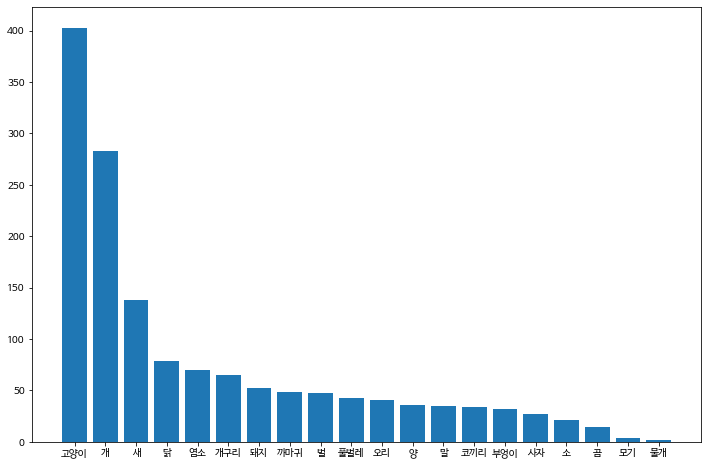

In [95]:
count_df = o_df.groupby('cate2').count().sort_values(by='name', ascending=False)
plt.figure(figsize=(12,8))
plt.bar(count_df.index, height=count_df['name'])

In [138]:
target_animals = ['고양이', '개', '염소','개구리'] 
print(target_animals)
result_df = pd.DataFrame()
for a in target_animals:
    temp = o_df[o_df['cate2']== a].copy()
    result_df = pd.concat([result_df, temp])
result_df.reset_index(inplace=True, drop=True)
result_df

['고양이', '개', '염소', '개구리']


,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate1,cate2
0,cat_35,../../sounds/animal/고양이 소리/cat_35.wav,11.000000,0.564131,0.067314,0.025919,0.001132,1429.288552,2.612002e+05,1612.312516,...,7.457832,35.269684,-2.501132,24.037781,1.829896,19.635115,1.710906,24.903175,animal,고양이
1,cat_141,../../sounds/animal/고양이 소리/cat_141.wav,0.941723,0.409352,0.080211,0.165388,0.006663,2596.732198,5.135426e+04,1524.065073,...,11.936614,40.342899,-8.426805,32.566399,6.773017,36.244740,-3.884769,35.042721,animal,고양이
2,1-47819-B-5,../../sounds/animal/고양이 소리/1-47819-B-5.wav,5.000000,0.438500,0.095735,0.005553,0.000041,2654.685243,1.751842e+05,2636.130122,...,-6.396316,33.586544,2.215581,33.081585,-8.530169,40.782906,-2.218924,86.056854,animal,고양이
3,cat_6,../../sounds/animal/cats_dogs/cat_6.wav,11.500000,0.675863,0.047439,0.028183,0.001136,1445.259695,5.188685e+05,1818.439417,...,0.885537,54.459682,8.594900,48.064693,6.021374,47.691811,2.553943,34.186470,animal,고양이
4,cat_110,../../sounds/animal/고양이 소리/cat_110.wav,1.272018,0.259342,0.095272,0.171115,0.010512,2171.597309,4.352366e+05,1793.060664,...,-13.009889,199.441040,-16.631609,92.513298,24.283859,269.449158,2.176965,76.417595,animal,고양이
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,frog (4),../../sounds/animal/개구리 소리/frog (4).wav,0.221814,0.239548,0.108472,0.286975,0.003568,2360.992387,1.540590e+04,1680.204793,...,-5.758052,30.605602,-8.011441,35.232216,7.316998,51.364983,-0.118540,58.313728,animal,개구리
817,speahammondii01,../../sounds/animal/개구리 소리/speahammondii01.mp3,1.071020,0.374024,0.116177,0.126744,0.008538,2481.361244,1.052920e+06,1964.389362,...,-7.063848,19.593475,-1.543129,23.932978,-2.719296,14.471077,4.687849,13.614118,animal,개구리
818,05-Frog,../../sounds/animal/개구리 소리/05-Frog.wav,0.439002,0.236887,0.104424,0.171188,0.009741,1842.961496,1.529850e+04,1057.155313,...,7.185624,13.397743,-4.783830,36.171528,17.056562,39.189903,-5.154148,49.068840,animal,개구리
819,4-99644-C-4,../../sounds/animal/개구리 소리/4-99644-C-4.wav,5.000000,0.220504,0.105246,0.110958,0.002452,1924.224069,5.817782e+03,954.060591,...,18.250429,60.984940,-9.412504,31.751270,-1.178963,14.788594,7.491617,27.051998,animal,개구리


In [139]:
result_df['duration'].describe()

count    821.000000
mean       6.357141
std        4.902613
min        0.221814
25%        2.560000
50%        5.000000
75%       10.538458
max       47.564354
Name: duration, dtype: float64

In [140]:
result_df[result_df['duration']<20].groupby('cate2').count().sort_values(by='name', ascending=False)

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate1
cate2,,,,,,,,,,,,,,,,,,,,,
고양이,398,398,398,398,398,398,398,398,398,398,...,398,398,398,398,398,398,398,398,398,398
개,281,281,281,281,281,281,281,281,281,281,...,281,281,281,281,281,281,281,281,281,281
염소,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
개구리,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65


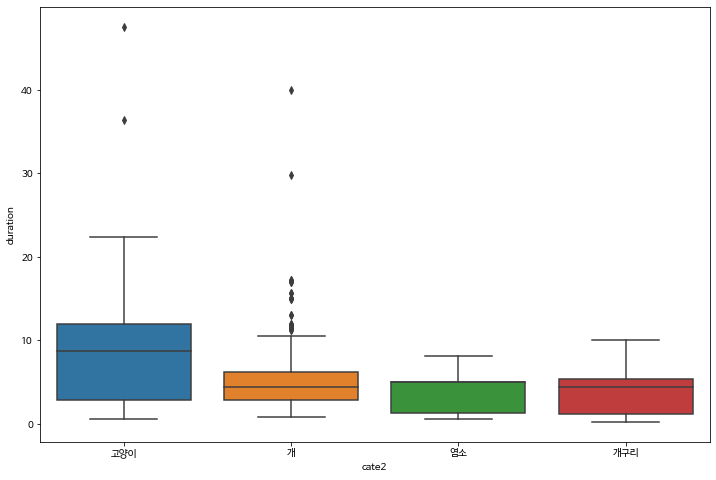

In [141]:
plt.figure(figsize=(12,8))
sns.boxplot(data=result_df, x='cate2', y='duration');

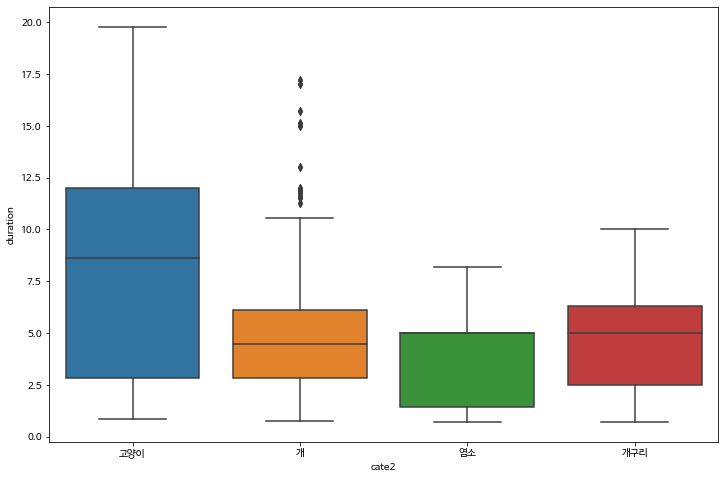

In [142]:
plt.figure(figsize=(12,8))
sns.boxplot(data=result_df[result_df['duration']<20][result_df['duration']>0.7], x='cate2', y='duration');

In [143]:
result_df.groupby('cate2').count()

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate1
cate2,,,,,,,,,,,,,,,,,,,,,
개,283,283,283,283,283,283,283,283,283,283,...,283,283,283,283,283,283,283,283,283,283
개구리,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
고양이,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
염소,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70


In [144]:
long_out = result_df[result_df['duration']>20].index.tolist()
short_out = result_df[result_df['duration']<0.7].index.tolist()
print("너무 긴 outlier 제외: ", len(long_out))
print("너무 짧은 outlier 제외: ", len(short_out))

너무 긴 outlier 제외:  7
너무 짧은 outlier 제외:  18


In [145]:
final_df = result_df.drop(long_out+short_out, axis=0)
final_df

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate1,cate2
0,cat_35,../../sounds/animal/고양이 소리/cat_35.wav,11.000000,0.564131,0.067314,0.025919,0.001132,1429.288552,2.612002e+05,1612.312516,...,7.457832,35.269684,-2.501132,24.037781,1.829896,19.635115,1.710906,24.903175,animal,고양이
1,cat_141,../../sounds/animal/고양이 소리/cat_141.wav,0.941723,0.409352,0.080211,0.165388,0.006663,2596.732198,5.135426e+04,1524.065073,...,11.936614,40.342899,-8.426805,32.566399,6.773017,36.244740,-3.884769,35.042721,animal,고양이
2,1-47819-B-5,../../sounds/animal/고양이 소리/1-47819-B-5.wav,5.000000,0.438500,0.095735,0.005553,0.000041,2654.685243,1.751842e+05,2636.130122,...,-6.396316,33.586544,2.215581,33.081585,-8.530169,40.782906,-2.218924,86.056854,animal,고양이
3,cat_6,../../sounds/animal/cats_dogs/cat_6.wav,11.500000,0.675863,0.047439,0.028183,0.001136,1445.259695,5.188685e+05,1818.439417,...,0.885537,54.459682,8.594900,48.064693,6.021374,47.691811,2.553943,34.186470,animal,고양이
4,cat_110,../../sounds/animal/고양이 소리/cat_110.wav,1.272018,0.259342,0.095272,0.171115,0.010512,2171.597309,4.352366e+05,1793.060664,...,-13.009889,199.441040,-16.631609,92.513298,24.283859,269.449158,2.176965,76.417595,animal,고양이
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,frog006,../../sounds/animal/개구리 소리/frog006.wav,5.000000,0.408294,0.107116,0.035385,0.003208,1722.201022,1.330839e+05,1926.415738,...,2.691147,41.597404,1.630553,50.648899,0.742653,48.881790,7.776286,46.224396,animal,개구리
814,frog (3),../../sounds/animal/개구리 소리/frog (3).wav,4.851655,0.337052,0.100882,0.127789,0.011256,1963.563587,1.887272e+05,1566.984195,...,13.518247,78.207031,1.010733,36.948193,-2.086380,16.658587,7.775502,70.480675,animal,개구리
817,speahammondii01,../../sounds/animal/개구리 소리/speahammondii01.mp3,1.071020,0.374024,0.116177,0.126744,0.008538,2481.361244,1.052920e+06,1964.389362,...,-7.063848,19.593475,-1.543129,23.932978,-2.719296,14.471077,4.687849,13.614118,animal,개구리
819,4-99644-C-4,../../sounds/animal/개구리 소리/4-99644-C-4.wav,5.000000,0.220504,0.105246,0.110958,0.002452,1924.224069,5.817782e+03,954.060591,...,18.250429,60.984940,-9.412504,31.751270,-1.178963,14.788594,7.491617,27.051998,animal,개구리


cate2
개      281
개구리     51
고양이    396
염소      68
Name: name, dtype: int64


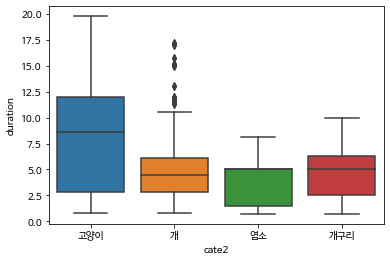

In [146]:
print(final_df.groupby('cate2').count()['name'])
sns.boxplot(data=final_df, x='cate2', y='duration');

---
# 분류

In [147]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
import pickle
import joblib
import seaborn as sns

In [148]:
def play_song(path):
    (file_dir, file_id) = os.path.split(path)
    print(file_id[:-4])
    print(IPython.display.display(IPython.display.Audio(path)))
def play_song_ls(cm_lr_df):
    for idx, path in enumerate(cm_lr_df['path']):
        print(cm_lr_df['pred'].iloc[idx])
        play_song(path)

In [149]:
def make_train_test(df):
    df = df.sample(frac=1)
    X = df.set_index('path').drop(['name','cate1','cate2','duration'], axis=1)
    y = df.set_index('path')[['cate2']].copy()
    print(f"X 개수:{len(X)}, y 개수:{len(y)}")
    print(df.groupby('cate2').count().sort_values('name')[['name']])
    return X, y

In [150]:
def model_fit_kfold(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cf = confusion_matrix(y_test, y_pred)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
    print("accuracy:", round(accuracy_score(y_test, y_pred),6))
    print("recall:", round(recall_score(y_test, y_pred, labels=np.unique(y_test), average='macro'),6))
    print("f1 score:", round(f1_score(y_test, y_pred, labels=np.unique(y_test), average='macro'),6))
#     print("Cross Validation Score:", cross_val_score(model, pd.concat([X_train, X_test]), pd.concat([y_train, y_test]), cv=kfold))
    ax = sns.heatmap(cf, annot=True, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), fmt="d", cmap="Blues")
    plt.title(str(model).split('(')[0])
    plt.show()
    return model, y_pred

In [151]:
def check_false_pred(y_pred):
    cm_lr_df = pd.DataFrame()
    cm_lr_df['answer'] = y_test['cate1'].tolist()
    cm_lr_df['pred'] = y_pred
    cm_lr_df['result'] = cm_lr_df['answer'] == cm_lr_df['pred']
    cm_lr_df['path'] = X_test.index
    cm_lr_df['cate2'] = [result_df[result_df['path']== p]['cate2'].iloc[0] for p in cm_lr_df['path']]
#     cm_lr_df['noise'] = [result_df[result_df['path']== p]['noise'].iloc[0] for p in cm_lr_df['path']]
#     cm_lr_df['name'] = [f"{p.split('/')[-2]}__{p.split('/')[-1][:-4]}" for p in cm_lr_df['path']]
#     [l.split('/')[-1]for l in cm_lr_df['path']]
    cm_lr_df = cm_lr_df[cm_lr_df['result']==False].sort_values(['answer', 'cate2'])
    return cm_lr_df

---
# Total songs

### Test dataset 만들기

In [152]:
count_df = final_df.groupby('cate2').count().sort_values(by='name', ascending=False)['name']
count_df

cate2
고양이    396
개      281
염소      68
개구리     51
Name: name, dtype: int64

<BarContainer object of 4 artists>

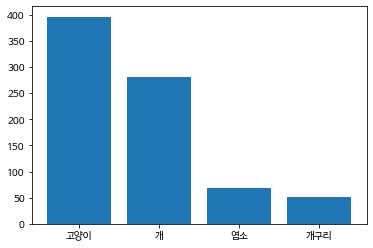

In [153]:
plt.bar(count_df.index, height=count_df)

In [162]:
### random samping으로 라벨별 test 데이터 뽑아두기
test_df = final_df.copy()
test_cat = test_df[test_df['cate2']=='고양이'].sample(n=150, random_state=13)
test_dog = test_df[test_df['cate2']=='개'].sample(n=50, random_state=13)
# test_bird = test_df[test_df['cate2']=='새'].sample(n=30, random_state=13)
# test_chicken = test_df[test_df['cate2']=='닭'].sample(n=28, random_state=13)
test_goat = test_df[test_df['cate2']=='염소'].sample(n=18, random_state=13)
test_frog = test_df[test_df['cate2']=='개구리'].sample(n=15, random_state=13)
# # test_pig = test_df[test_df['cate2']=='돼지'].sample(n=15, random_state=13)
test_df = pd.concat([test_cat, test_dog, test_goat, test_frog])
test_df.groupby('cate2').count().sort_values('name')[['name']]

,name
cate2,
개구리,15
염소,18
개,50
고양이,150


In [163]:
X_test, y_test = make_train_test(test_df)

X 개수:233, y 개수:233
       name
cate2      
개구리      15
염소       18
개        50
고양이     150


In [164]:
train_df = result_df.drop(test_df.index, axis=0)
train_df.groupby('cate2').count().sort_values('name')[['name']]

,name
cate2,
개구리,50
염소,52
개,233
고양이,253


X 개수:588, y 개수:588
       name
cate2      
개구리      50
염소       52
개       233
고양이     253
---------DecisionTreeClassifier---------------
accuracy: 0.811159
recall: 0.688889
f1 score: 0.672445


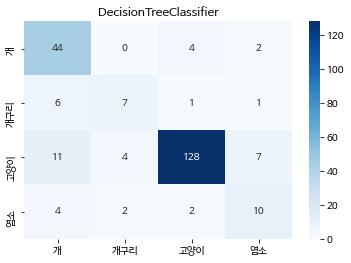

---------XGBClassifier---------------
accuracy: 0.905579
recall: 0.78
f1 score: 0.80678


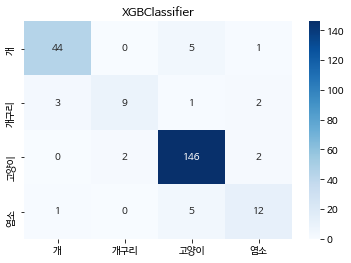

---------RandomForestClassifier---------------
accuracy: 0.866953
recall: 0.759444
f1 score: 0.777034


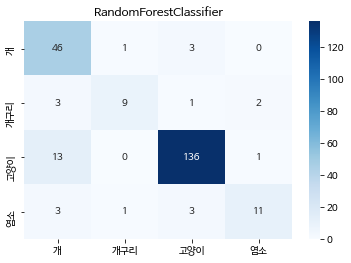

In [165]:
X_train, y_train = make_train_test(train_df)
# print("---------LogisticRegression---------------")
# lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------RandomForestClassifier---------------
accuracy: 0.838174
recall: 0.725152
f1 score: 0.727887


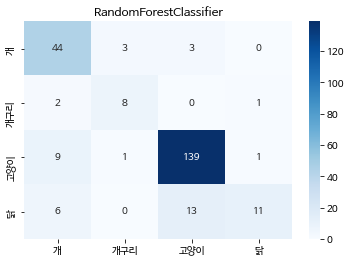

---------XGBClassifier---------------
accuracy: 0.86722
recall: 0.735758
f1 score: 0.756916


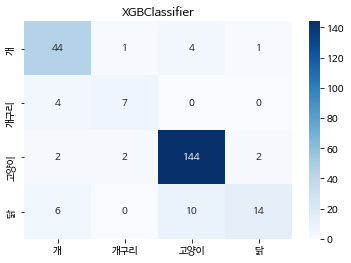

['models/XGB_animal4_1.pkl']

In [124]:
# print("---------DecisionTreeClassifier---------------")
# dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
# # 모델 저장
# joblib.dump(xgb_model, 'models/DTC_animal4_85.pkl')
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))
# 모델 저장
joblib.dump(rf_model, 'models/RF_animal4_1.pkl')

print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
# 모델 저장
joblib.dump(xgb_model, 'models/XGB_animal4_1.pkl')

### 2. oversamping - imblearn.ADASYN
- SMOTE에 비해 ADASYN이 조금 더 사실적으로 데이터 간의 분산을 넣어 오버샘플링해준다 함

In [166]:
X_test, y_test = make_train_test(test_df)
train_df = result_df.drop(test_df.index, axis=0)
X_train, y_train = make_train_test(train_df)
X_train, y_train = ADASYN(sampling_strategy='minority', random_state=13).fit_resample(X_train, y_train) # oversamping
y_train.reset_index().groupby('cate2').count()

X 개수:233, y 개수:233
       name
cate2      
개구리      15
염소       18
개        50
고양이     150
X 개수:588, y 개수:588
       name
cate2      
개구리      50
염소       52
개       233
고양이     253


,index
cate2,
개,233
개구리,248
고양이,253
염소,52


---------DecisionTreeClassifier---------------
accuracy: 0.802575
recall: 0.735556
f1 score: 0.699135


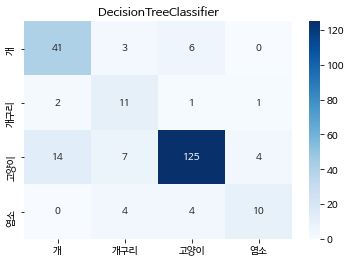

---------XGBClassifier---------------
accuracy: 0.901288
recall: 0.772222
f1 score: 0.786404


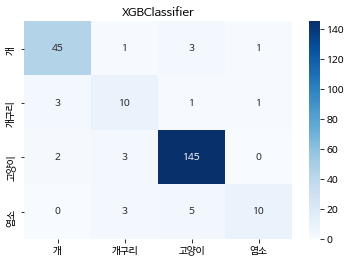

---------RandomForestClassifier---------------
accuracy: 0.866953
recall: 0.748889
f1 score: 0.750548


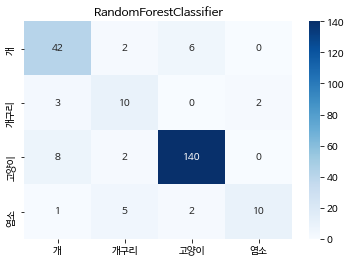

In [167]:
# print("---------LogisticRegression---------------")
# lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------DecisionTreeClassifier---------------
accuracy: 0.781893
recall: 0.697738
f1 score: 0.675285


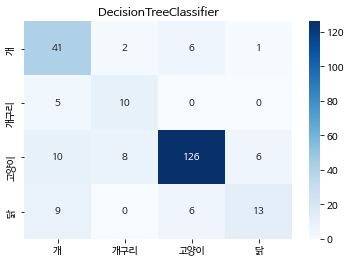

---------RandomForestClassifier---------------
accuracy: 0.855967
recall: 0.704286
f1 score: 0.726952


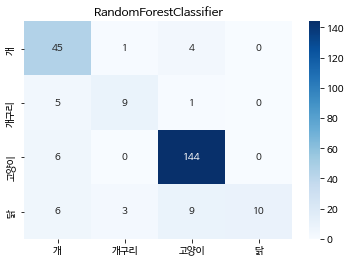

---------XGBClassifier---------------
accuracy: 0.880658
recall: 0.761667
f1 score: 0.770684


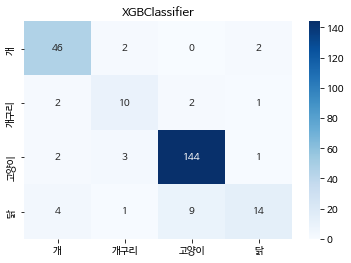

['models/XGB_animal4_1_oversampling.pkl']

In [137]:
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
# 모델 저장
joblib.dump(xgb_model, 'models/DTC_animal4_1.pkl')

print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))
# 모델 저장
joblib.dump(rf_model, 'models/RF_animal4_1_oversampling.pkl')

print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
# 모델 저장
joblib.dump(xgb_model, 'models/XGB_animal4_1_oversampling.pkl')

---
# short_df
- 노래 길이 백분위 55% 미만 데이터 기준

409
cate2
개      200
고양이    150
새       59
Name: duration, dtype: int64
count    409.000000
mean       3.448443
std        1.396911
min        1.015692
25%        2.108027
50%        3.622449
75%        5.000000
max        5.120000
Name: duration, dtype: float64


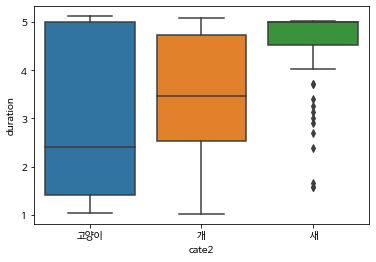

In [88]:
short_df = final_df[final_df['duration']<np.percentile(final_df['duration'], 53)]#[final_df['duration']>np.percentile(final_df['duration'], 25)]
print(len(short_df))
print(short_df.groupby('cate2')['duration'].count())
print(short_df['duration'].describe())
sns.boxplot(data=short_df, x='cate2', y='duration');

## Test dataset 만들기

In [99]:
### random samping으로 라벨별 test 데이터 뽑아두기
test_df = short_df.copy()
test_cat = test_df[test_df['cate2']=='고양이'].sample(n=100, random_state=1)
test_dog = test_df[test_df['cate2']=='개'].sample(n=100, random_state=13)
test_bird = test_df[test_df['cate2']=='새'].sample(n=9, random_state=13)
# test_chicken = test_df[test_df['cate2']=='닭'].sample(n=30, random_state=13)
# test_goat = test_df[test_df['cate2']=='염소'].sample(n=7, random_state=13)
# test_frog = test_df[test_df['cate2']=='개구리'].sample(n=10, random_state=13)
# test_pig = test_df[test_df['cate2']=='돼지'].sample(n=7, random_state=13)
test_df = pd.concat([test_cat, test_dog, test_bird])
test_df.groupby('cate2').count().sort_values('name')[['name']]

,name
cate2,
새,9
개,100
고양이,100


In [100]:
X_test, y_test = make_train_test(test_df)

X 개수:209, y 개수:209
       name
cate2      
새         9
개       100
고양이     100


In [101]:
train_df = short_df.drop(test_df.index, axis=0)
train_df.groupby('cate2').count().sort_values('name')[['name']]

,name
cate2,
고양이,50
새,50
개,100


### 0. 그대로 테스트

X 개수:200, y 개수:200
       name
cate2      
고양이      50
새        50
개       100
---------DecisionTreeClassifier---------------
accuracy: 0.827751
recall: 0.812593
f1 score: 0.711507


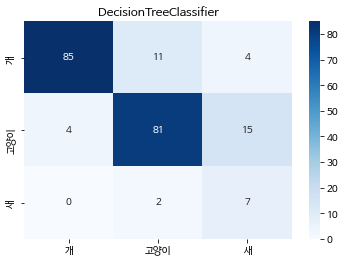

---------XGBClassifier---------------
accuracy: 0.866029
recall: 0.872963
f1 score: 0.782078


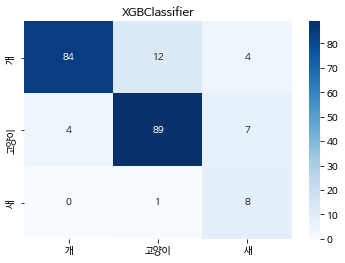

---------RandomForestClassifier---------------
accuracy: 0.818182
recall: 0.83963
f1 score: 0.721935


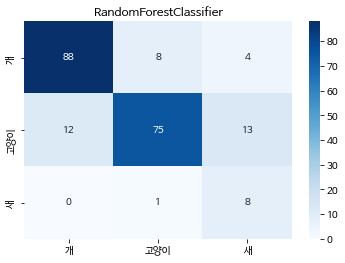

In [103]:
X_train, y_train = make_train_test(train_df)
# print("---------LogisticRegression---------------")
# lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------RandomForestClassifier---------------
accuracy: 0.889952
recall: 0.923333
f1 score: 0.880133


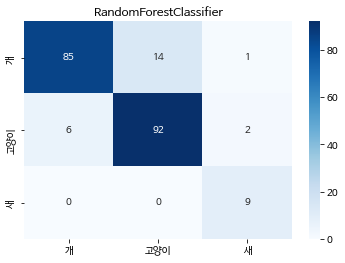

---------XGBClassifier---------------
accuracy: 0.84689
recall: 0.825926
f1 score: 0.7442


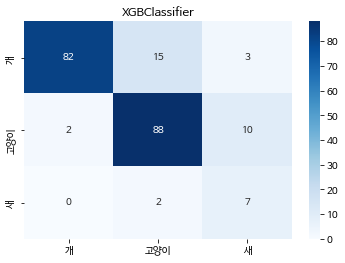

['models/XGB_animal3_under3s_86.pkl']

In [102]:
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))
# 모델 저장
joblib.dump(rf_model, 'models/RF_animal3_under3s_85.pkl')

print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
# 모델 저장
joblib.dump(rf_model, 'models/XGB_animal3_under3s_86.pkl')

### 2. oversamping - imblearn.ADASYN
- SMOTE에 비해 ADASYN이 조금 더 사실적으로 데이터 간의 분산을 넣어 오버샘플링해준다 함

In [96]:
X_test, y_test = make_train_test(test_df)
train_df = short_df.drop(test_df.index, axis=0)
X_train, y_train = make_train_test(train_df)
X_train, y_train = ADASYN(random_state=1).fit_resample(X_train, y_train) # oversamping
y_train.reset_index().groupby('cate2').count()

X 개수:209, y 개수:209
       name
cate2      
새         9
개       100
고양이     100
X 개수:200, y 개수:200
       name
cate2      
고양이      50
새        50
개       100


,index
cate2,
개,100
고양이,100
새,97


---------DecisionTreeClassifier---------------
accuracy: 0.803828
recall: 0.795926
f1 score: 0.704938


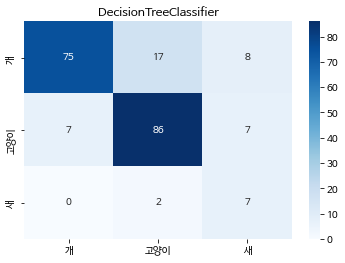

---------XGBClassifier---------------
accuracy: 0.84689
recall: 0.825926
f1 score: 0.7442


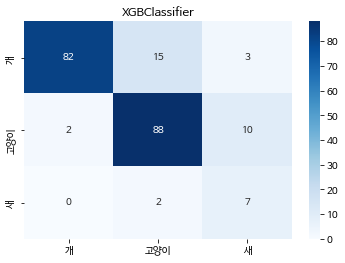

---------RandomForestClassifier---------------
accuracy: 0.889952
recall: 0.923333
f1 score: 0.880133


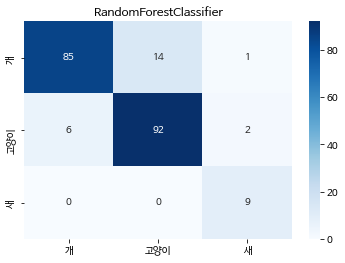

In [97]:
# print("---------LogisticRegression---------------")
# lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------RandomForestClassifier---------------
accuracy: 0.889952
recall: 0.923333
f1 score: 0.880133


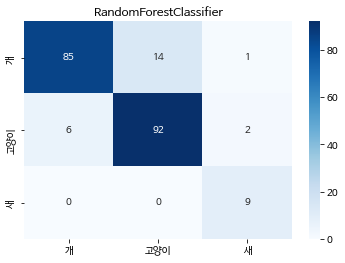

['models/RF_animal3_under3s_oversampling_89.pkl']

In [98]:
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))
# 모델 저장
joblib.dump(rf_model, 'models/RF_animal3_under3s_oversampling_89.pkl')

# print("---------XGBClassifier---------------")
# xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
#                                            learning_rate=0.1,
#                                            eval_metric='mlogloss'))
# # 모델 저장
# joblib.dump(rf_model, 'models/XGB_animal6_under3s_oversampling_90.pkl')

---
# long_df
- 노래 길이 백분위 50% 이상 데이터 기준

363
cate1
animal    363
Name: duration, dtype: int64
count    363.000000
mean      11.102882
std        3.231435
min        5.165986
25%        8.930590
50%       11.700000
75%       12.000000
max       19.957551
Name: duration, dtype: float64


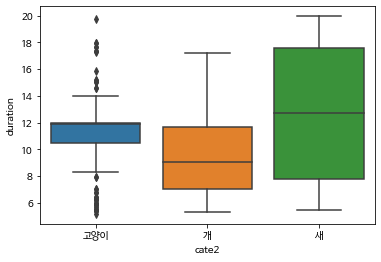

In [104]:
long_df = final_df[final_df['duration']>=np.percentile(final_df['duration'], 53)]#[final_df['duration']<=np.percentile(final_df['duration'], 75)]
print(len(long_df))
print(long_df.groupby('cate1')['duration'].count())
print(long_df['duration'].describe())
sns.boxplot(data=long_df, x='cate2', y='duration');

In [105]:
X, y = make_train_test(long_df)

X 개수:363, y 개수:363
       name
cate2      
새        55
개        79
고양이     229


## Test dataset 만들기

In [116]:
### random samping으로 라벨별 test 데이터 뽑아두기
test_df = long_df.copy()
test_cat = test_df[test_df['cate2']=='고양이'].sample(n=100, random_state=1)
test_dog = test_df[test_df['cate2']=='개'].sample(n=19, random_state=13)
test_bird = test_df[test_df['cate2']=='새'].sample(n=15, random_state=13)
# test_chicken = test_df[test_df['cate2']=='닭'].sample(n=30, random_state=13)
# test_goat = test_df[test_df['cate2']=='염소'].sample(n=15, random_state=13)
# test_frog = test_df[test_df['cate2']=='개구리'].sample(n=9, random_state=13)
# test_pig = test_df[test_df['cate2']=='돼지'].sample(n=8, random_state=13)
test_df = pd.concat([test_cat, test_dog, test_bird])
test_df.groupby('cate2').count().sort_values('name')[['name']]

,name
cate2,
새,15
개,19
고양이,100


In [117]:
X_test, y_test = make_train_test(test_df)

X 개수:134, y 개수:134
       name
cate2      
새        15
개        19
고양이     100


In [118]:
train_df = long_df.drop(test_df.index, axis=0)
train_df.groupby('cate2').count().sort_values('name')[['name']]

,name
cate2,
새,40
개,60
고양이,129


### 0. 그대로 테스트

X 개수:229, y 개수:229
       name
cate2      
새        40
개        60
고양이     129
---------DecisionTreeClassifier---------------
accuracy: 0.895522
recall: 0.816257
f1 score: 0.822361


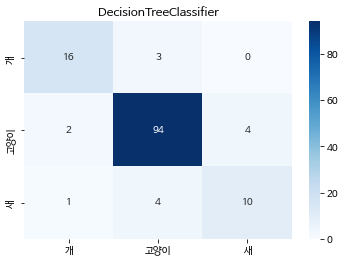

---------XGBClassifier---------------
accuracy: 0.91791
recall: 0.807368
f1 score: 0.830772


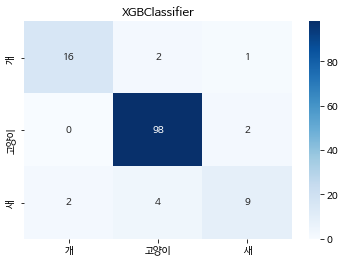

---------RandomForestClassifier---------------
accuracy: 0.895522
recall: 0.77848
f1 score: 0.800563


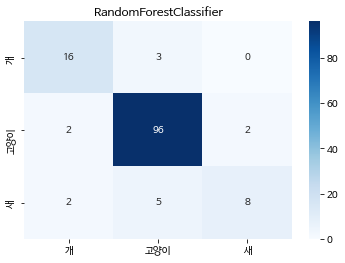

In [119]:
X_train, y_train = make_train_test(train_df)
# print("---------LogisticRegression---------------")
# lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------RandomForestClassifier---------------
accuracy: 0.895522
recall: 0.77848
f1 score: 0.800563


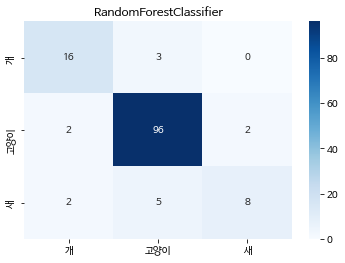

---------XGBClassifier---------------
accuracy: 0.91791
recall: 0.807368
f1 score: 0.830772


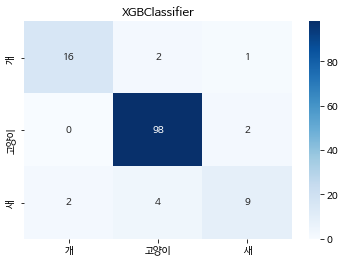

['models/XGB_animal6_over3s_92.pkl']

In [120]:
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))
# 모델 저장: 정확도 75
joblib.dump(rf_model, 'models/RF_animal3_over3s_89.pkl')

print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
# 모델 저장: 정확도 75
joblib.dump(rf_model, 'models/XGB_animal6_over3s_92.pkl')

### 2. oversamping - imblearn.ADASYN
- SMOTE에 비해 ADASYN이 조금 더 사실적으로 데이터 간의 분산을 넣어 오버샘플링해준다 함

In [113]:
X_test, y_test = make_train_test(test_df)
train_df = long_df.drop(test_df.index, axis=0)
X_train, y_train = make_train_test(train_df)
X_train, y_train = ADASYN(random_state=13).fit_resample(X_train, y_train) # oversamping
y_train.reset_index().groupby('cate2').count()

X 개수:134, y 개수:134
       name
cate2      
새        15
개        19
고양이     100
X 개수:229, y 개수:229
       name
cate2      
새        40
개        60
고양이     129


,index
cate2,
개,141
고양이,129
새,126


---------DecisionTreeClassifier---------------
accuracy: 0.843284
recall: 0.717368
f1 score: 0.707282


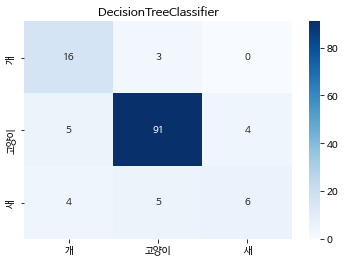

---------XGBClassifier---------------
accuracy: 0.895522
recall: 0.816257
f1 score: 0.805533


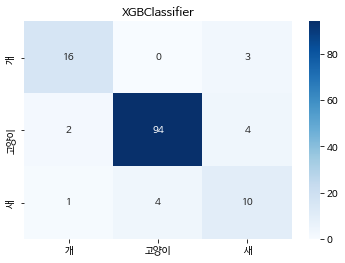

---------RandomForestClassifier---------------
accuracy: 0.902985
recall: 0.814912
f1 score: 0.826352


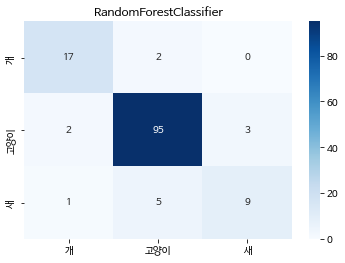

In [114]:
# print("---------LogisticRegression---------------")
# lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------RandomForestClassifier---------------
accuracy: 0.902985
recall: 0.814912
f1 score: 0.826352


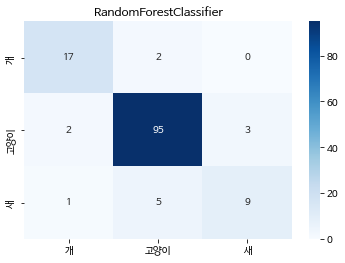

['models/RF_animal3_over3s_oversampling_90.pkl']

In [115]:
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))
# 모델 저장: 정확도 75
joblib.dump(rf_model, 'models/RF_animal3_over3s_oversampling_90.pkl')

# print("---------XGBClassifier---------------")
# xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
#                                            learning_rate=0.1,
#                                            eval_metric='mlogloss'))
# # 모델 저장: 정확도 75
# joblib.dump(rf_model, 'models/XGB_animal6_over3s_oversampling_79.pkl')

---
## 모델 저장하기
- short song
- long song

In [188]:
list(set(glob.glob(f'models/RF_animal6*')))

['models/RF_animal6_under3s_oversampling_83.pkl',
 'models/RF_animal6_over3s_oversampling_75.pkl',
 'models/RF_animal6_80.pkl',
 'models/RF_animal6_under3s_69.pkl']